In [77]:
# 49e99c4
# branch: parameter search implementation

import openpiv_recipes as piv
import numpy as np
from matplotlib import pyplot as plt
from importlib import reload
reload(piv)

folder_path = '/Users/yeonsu/Dropbox (Harvard University)/Riblet/data/piv-data/2021-01-20'
# folder_path = '/Users/yeonsu/Dropbox (Harvard University)/Riblet/data/piv-data/2021-02-04'
# folder_path = '/Volumes/Backup Plus /ROWLAND/piv-data/2021-02-04'
pi = piv.ParticleImage(folder_path)

piv_param = {
    "winsize": 48,
    "searchsize": 52,
    "overlap": 24,
    "dt": 0.0001,
    "image_check": False,
    "show_vertical_profiles": False,
    "figure_export_name": '_quick_piv.tiff',
    "text_export_name": '_quick_piv.txt',
    "scale_factor": 1,            
    "pixel_density": 39.545,
    "arrow_width": 0.02,
    "show_result": True,
    "upper_bound": 2000,
    "lower_bound": 0,        
    }

In [78]:
def large_quiver(window_size,scaling_factor):
    bgd, bgd2 = pi.read_two_images(search_dict,index_a=101,index_b=102)
    bgd = -np.array(bgd).T
    piv_result = np.loadtxt('_quick_piv.txt')
    arrow_width = 0.002

    xx = piv_result[:,0].T * 0.8 * bgd.shape[1] / np.max(piv_result[:,0])
    yy = piv_result[:,1].T * bgd.shape[0] / np.max(piv_result[:,1])
    uu = piv_result[:,2].T
    vv = piv_result[:,3].T

    fig, ax = plt.subplots(figsize=(10,10))

    xmax = np.amax(piv_result[:, 0]) + window_size / (2 * scaling_factor)
    ymax = np.amax(piv_result[:, 1]) + window_size / (2 * scaling_factor)

    ax.quiver(xx,yy,uu,vv,angles='uv',width=arrow_width,color='r')    
    ax.imshow(bgd,origin="lower", cmap="Greys_r",interpolation='nearest',aspect='auto')

In [79]:
exp_cond_dict = {'sample': 'Flat_20', 'motor': 25}
pi.set_piv_list(exp_cond_dict)

search_dict = {'pos': 1, 'VOFFSET': 0}
pi.set_piv_param(piv_param)


- PIV parameters -
winsize: 32
searchsize: 36
overlap: 16
dt: 0.0005
image_check: False
show_vertical_profiles: False
figure_export_name: _quick_piv.tiff
text_export_name: _quick_piv.txt
scale_factor: 1000.0
pixel_density: 39.545
arrow_width: 0.02
show_result: True
upper_bound: 5000
lower_bound: 0
Read image from: img_Flat_20_motor25.00_pos1_VOFFSET0_ag2_laser10


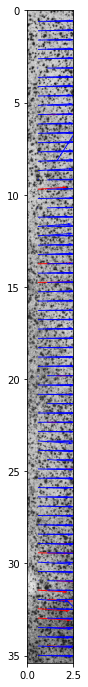

Std of u3: 184.552
Mean of u3: 701.761
Read image from: img_Flat_20_motor25.00_pos1_VOFFSET0_ag2_laser10


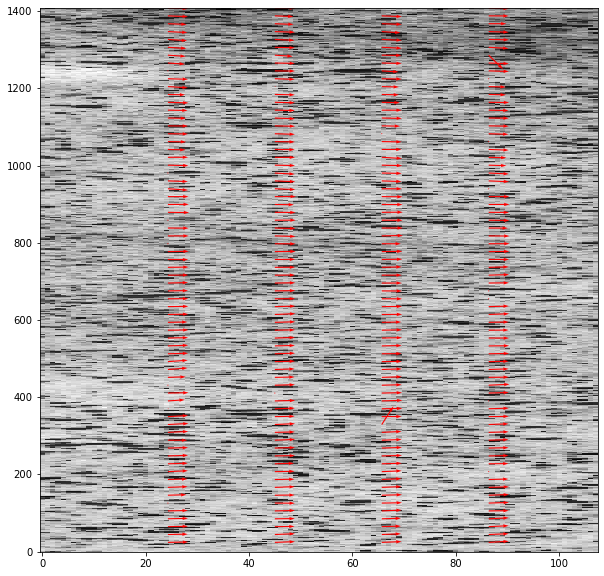

In [80]:
small = {"winsize": 32, "searchsize": 36, "overlap": 16, "scale_factor": 1e3,'dt': 0.0005,'upper_bound': 5000}
pi.set_piv_param(small)
pi.quick_piv_by_key(search_dict,index_a=100,index_b=101)
large_quiver(16,1)


In [81]:
a = np.loadtxt('_quick_piv.txt')
u_array = a[:,2]
v_array = a[:,3]

u_mean = np.mean(u_array)
u_std = np.std(u_array)

v_mean = np.mean(v_array)
v_std = np.std(v_array)

print('u = %.2f +- %.2f mm/s'%(u_mean,u_std))
print('v = %.2f +- %.2f mm/s'%(v_mean,v_std))

u = 701.76 +- 184.55 mm/s
v = 2.91 +- 56.23 mm/s


Why do we have 'zero' vectors? - Should we remove them?